# Telco Customer Churn Prediction - Feature Engineering

This notebook presents the second step in developing a machine learning model to predict customer churn for a telecommunications company. In the first notebook, I cleaned and merged the excel files provided in [IBM's sample datasets](https://accelerator.ca.analytics.ibm.com/bi/?perspective=authoring&pathRef=.public_folders%2FIBM%2BAccelerator%2BCatalog%2FContent%2FDAT00148&id=i9710CF25EF75468D95FFFC7D57D45204&objRef=i9710CF25EF75468D95FFFC7D57D45204&action=run&format=HTML&cmPropStr=%7B%22id%22%3A%22i9710CF25EF75468D95FFFC7D57D45204%22%2C%22type%22%3A%22reportView%22%2C%22defaultName%22%3A%22DAT00148%22%2C%22permissions%22%3A%5B%22execute%22%2C%22read%22%2C%22traverse%22%5D%7D) into a single CSV file containing a consolidated dataset.

In this notebook, I will:

- Examine missing values and handle them appropriately

- Identify redundant and useful features

- Analyze data types and transform features as needed

- Explore data distributions and correlations

- Transform heavily skewed features and inspect outliers

The goal is to transform the raw data into a format suitable for machine learning models.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## 1. Loading and inspecting data

In [2]:
telco = pd.read_csv("../data/processed/telco_merged.csv", index_col=0)

print(f"Shape: {telco.shape}")
telco.head()

Shape: (7043, 56)


,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,location_id,country,state,city,zip_code,lat_long,latitude,longitude,service_id,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,status_id,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,id,population
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,1,Female,37,No,No,Yes,No,0,FUGQUJ6597,United States,California,Frazier Park,93225,"34.827662, -118.999073",34.827662,-118.999073,MJBAXYDAX5462,Q3,Yes,2,9,NaN,Yes,42.39,No,Yes,Cable,16,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,UAAWUJ8685,3,Stayed,No,0,65,2205,NaN,NaN,661,4498
0003-MKNFE,1,Male,46,No,No,No,No,0,SIZFEJ5344,United States,California,Glendale,91206,"34.162515, -118.203869",34.162515,-118.203869,NICWXTOGG9486,Q3,No,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,59.9,542.40,38.33,10,96.21,610.28,URNYXG9268,5,Stayed,No,0,66,5414,NaN,NaN,185,31297
0004-TLHLJ,1,Male,50,No,No,No,No,0,RZDAXJ8786,United States,California,Costa Mesa,92627,"33.645672, -117.922613",33.645672,-117.922613,DCSKWRXAI3251,Q3,No,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,LOOUCZ6174,1,Churned,Yes,1,71,4479,Competitor,Competitor had better devices,546,62069
0011-IGKFF,1,Male,78,No,Yes,Yes,No,0,MGKGVM9555,United States,California,Martinez,94553,"38.014457, -122.115432",38.014457,-122.115432,ZEOATALAE9483,Q3,Yes,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,HDYLOW1467,1,Churned,Yes,1,91,3714,Dissatisfaction,Product dissatisfaction,984,46677
0013-EXCHZ,1,Female,75,No,Yes,Yes,No,0,FJLSME1564,United States,California,Camarillo,93010,"34.227846, -119.079903",34.227846,-119.079903,MVMZRJAHU9423,Q3,Yes,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,EICWUI5128,1,Churned,Yes,1,68,3464,Dissatisfaction,Network reliability,618,42853


In [3]:
# Check if there are any duplicated rows
telco.duplicated().sum()

0

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   count                              7043 non-null   int64  
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   married                            7043 non-null   object 
 6   dependents                         7043 non-null   object 
 7   number_of_dependents               7043 non-null   int64  
 8   location_id                        7043 non-null   object 
 9   country                            7043 non-null   object 
 10  state                              7043 non-null   object 
 11  city                               7043 non-nu

## 2. Handling missing values

In [5]:
def missing_values(df):
    """Generate a dataframe containing info on missing values"""
    missing = df.isna().sum()
    missing_pct = round(100 * (missing / len(df)), 2)

    res = pd.DataFrame({
        'missing_count': missing.values,
        'missing_pct': missing_pct,
    })

    return res[res['missing_count'] > 0]

missing_values(telco).sort_values('missing_count', ascending=False)

,missing_count,missing_pct
churn_category,5174,73.46
churn_reason,5174,73.46
offer,3877,55.05
internet_type,1526,21.67


In [6]:
for col in ['offer', 'internet_type', 'churn_category', 'churn_reason']:
    print(f"Column: {col} ({telco[col].dtype})")
    print(f"Values: {telco[col].unique()}", end='\n\n')

Column: offer (object)
Values: [nan 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']

Column: internet_type (object)
Values: ['Cable' 'Fiber Optic' 'DSL' nan]

Column: churn_category (object)
Values: [nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']

Column: churn_reason (object)
Values: [nan 'Competitor had better devices' 'Product dissatisfaction'
 'Network reliability' 'Limited range of services'
 'Competitor made better offer' "Don't know" 'Long distance charges'
 'Attitude of service provider' 'Attitude of support person'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Lack of affordable download/upload speed'
 'Deceased' 'Moved' 'Service dissatisfaction' 'Price too high'
 'Lack of self-service on Website' 'Poor expertise of online support'
 'Extra data charges' 'Poor expertise of phone support']



### Analyzing features with missing values

1. `offer` and `internet_type`: One optino here is to assign binary values reflecting the existence of an offer or an internet service. However, I'll choose to preserve more information by replacing null values by no_offer/no_internet entries as different internet or offer types hay have impact on customer churn.

In [7]:
telco['internet_type'] = telco['internet_type'].apply(lambda x: 'no_internet' if x is np.nan else x)

telco['internet_type'].value_counts()

internet_type
Fiber Optic    3035
DSL            1652
no_internet    1526
Cable           830
Name: count, dtype: int64

In [8]:
telco['offer'] = telco['offer'].apply(lambda x: 'no_offer' if x is np.nan else x)

telco['offer'].value_counts()

offer
no_offer    3877
Offer B      824
Offer E      805
Offer D      602
Offer A      520
Offer C      415
Name: count, dtype: int64

2. `churn_category` and `churn_reason`: These attributes provide reasons for why a customer has left. This information could be helpful for a different analysis, but it would cause data leakage in prediction modeling, hence I'll drop these columns.

In [9]:
telco.drop(['churn_category', 'churn_reason'], axis=1, inplace=True)

Check the dataset after handling missing values:

In [10]:
print(f"Shape: {telco.shape}")
print(f"Missing value count: {telco.isna().sum().sum()}")

Shape: (7043, 54)
Missing value count: 0


## 3. Analyzing features based on redundancy and usefulness

In this section, I'll identify features that will be transformed or dropped from the dataset.

In [11]:
# Get an overview of the features
for col in telco.columns:
    print(f"Column: {col} ({telco[col].dtype})")
    print(f"Values: {telco[col].unique()}", end='\n\n')

Column: count (int64)
Values: [1]

Column: gender (object)
Values: ['Female' 'Male']

Column: age (int64)
Values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]

Column: under_30 (object)
Values: ['No' 'Yes']

Column: senior_citizen (object)
Values: ['No' 'Yes']

Column: married (object)
Values: ['Yes' 'No']

Column: dependents (object)
Values: ['No' 'Yes']

Column: number_of_dependents (int64)
Values: [0 3 1 2 4 6 5 9 7 8]

Column: location_id (object)
Values: ['FUGQUJ6597' 'SIZFEJ5344' 'RZDAXJ8786' ... 'WQKQWU2461' 'SIQQRR3964'
 'CRAMQJ1493']

Column: country (object)
Values: ['United States']

Column: state (object)
Values: ['California']

Column: city (object)
Values: ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']

Column: zip_code (int64)
Values: [93225 91206 92627 ... 91934 93013 95956]

Column: lat_l

### 3.1 `internet_service`

I'll drop this feature as cleaning and keeping `internet_type` in the last section makes it redundant. Just to make sure the data is non-problematic here, I'll first check whether `internet_service` coresponds to no_internet in `internet_type`.

In [12]:
# Check whether both columns correspond perfectly
((telco['internet_service'] == 'No') == (telco['internet_type'] == 'no_internet')).all()

True

In [13]:
telco.drop(['internet_service'], axis=1, inplace=True)

### 3.2 `dependents`

Since there is already a `number_of_dependents` feature, I'll drop this column after checking whether the two columns correspond perfectly.

In [14]:
((telco['dependents'] == 'No') == (telco['number_of_dependents'] == 0)).all()

True

In [15]:
telco.drop(['dependents'], axis=1, inplace=True)

### 3.3 `referred_a_friend`

Since there is already a `number_of_referrals` feature, I'll drop this column after checking data integrity.

In [16]:
((telco['referred_a_friend'] == 'No') == (telco['number_of_referrals'] == 0)).all()

True

In [17]:
telco.drop(['referred_a_friend'], axis=1, inplace=True)

### 3.4 Features with no variance, and identifier features

There are some features in the dataset that contain the same single value for all customers, and at the other extreme, some that are unique for each customer. I'll drop both cases as they are not useful for prediction.

Additionally, the `id` column is a remnant of the population excel file (see previous notebook) which identifies zip codes, and is not useful for my analysis.

In [18]:
def cardinality(df, max_display=3):
    res = pd.DataFrame({
        'nunique': df.nunique(),
        'dtype': df.dtypes
    }).sort_values(by='nunique')

    res['unique_values'] = [
        df[col].unique().tolist() if res.loc[col, 'nunique'] <= max_display
        else f"[{', '.join(map(str, df[col].unique()[:max_display]))} ...(cont'd)]"
        for col in res.index
    ]

    return res

cardinality(telco)

,nunique,dtype,unique_values
count,1,int64,[1]
country,1,object,[United States]
state,1,object,[California]
quarter,1,object,[Q3]
churn_value,2,int64,"[0, 1]"
churn_label,2,object,"[No, Yes]"
paperless_billing,2,object,"[Yes, No]"
unlimited_data,2,object,"[Yes, No]"
streaming_music,2,object,"[No, Yes]"
streaming_movies,2,object,"[No, Yes]"


In [19]:
cols_to_drop = ['count', 'country', 'state', 'quarter', 'id', 'location_id', 'status_id', 'service_id']

telco.drop(cols_to_drop, axis=1, inplace=True)

### 3.5 Location features

Location related columns such as `city`, `zip_code` and `population` (which gives the population of the zip code, see the first notebook for details) are nominal features with high cardinality. One-hot encoding these features would create extremely sparse features, potentially leading to overfitting and computational complexity.

Similarly, the continuous features `latitude`, `longitude` and `lat_long` could provide valuable distance and approximity information, but for simplicity, I'll remove these features and focus on more directly interpretable variables.

In [20]:
telco.drop(['latitude', 'longitude', 'lat_long', 'city', 'zip_code', 'population'], axis=1, inplace=True)

### 3.6 Age related features

There are multiple age-related features: The numeric `age` column, and the binary `under_30` and `senior_citizen` columns.

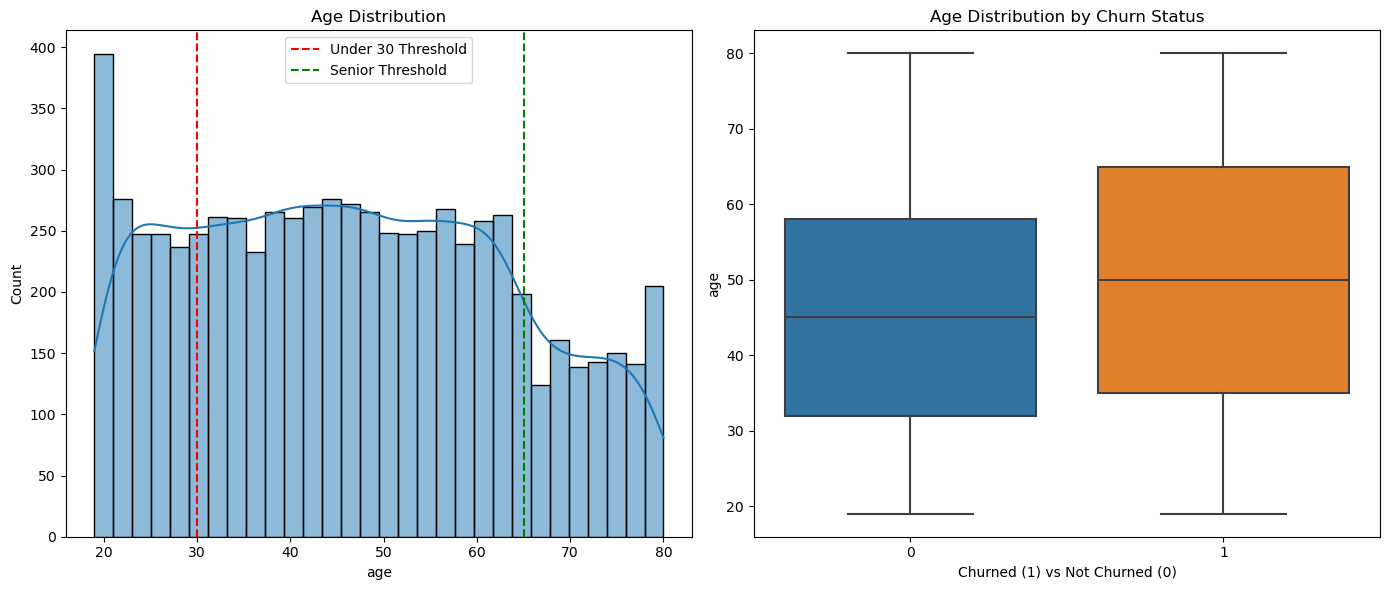

In [21]:
# Visualize age distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(telco['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.axvline(x=30, color='r', linestyle='--', label='Under 30 Threshold')
plt.axvline(x=65, color='g', linestyle='--', label='Senior Threshold')
plt.legend()

plt.subplot(1, 2, 2)
age_churn = pd.DataFrame({
    'age': telco['age'],
    'churn': telco['churn_value']
})
sns.boxplot(x='churn', y='age', data=age_churn)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churned (1) vs Not Churned (0)')

plt.tight_layout()
plt.show()

I'll only keep `age` to preserve more information while avoiding repetition. It's revisit experimenting with age groups during modeling.

In [22]:
telco.drop(['under_30', 'senior_citizen'], axis=1, inplace=True)

### 3.7 Handling the target variable

There are four remaining features in the dataset that provide info on the churn of customers: `churn_label`, `churn_value`, `churn_score`, `customer_status`

In [23]:
# Inspect churn related features that remain:
for col in ['churn_label', 'churn_value', 'churn_score', 'customer_status']:
    print(f"Column: {col} ({telco[col].dtype})")
    print(f"Values: {telco[col].unique()}", end='\n\n')

Column: churn_label (object)
Values: ['No' 'Yes']

Column: churn_value (int64)
Values: [0 1]

Column: churn_score (int64)
Values: [65 66 71 91 68 55 26 49 34 25 54 52 57 53 37 50 92 85 61 75 78 59 81 74
 60 76 20 42 72 29 46 95 73 36 67 43 93 48 39 30 62 33 89 80 40 45 94 90
 63 77 82 87 69 64 79 84 32 44 21 86 51 23 70 83 41 47 27 28 35 38 58 96
 24 88 56 31 22  8  7  9  5]

Column: customer_status (object)
Values: ['Stayed' 'Churned' 'Joined']



In [24]:
# Check whether churn_value and churn_label correspond perfectly
((telco['churn_value'] == 'Yes') == (telco['churn_label'] == 1)).all()

True

In [25]:
# Check whether churn_value and customer_status correspond perfectly on churns
((telco['churn_value'] == 1) == (telco['customer_status'] == 'Churned')).all()

True

Observations:

- `churn_score` seems to be a probability or score reflecting churn risk.

- `customer_status` provides not only churn info, but also for newly joined customers

For my modeling task, I'll use binary data for churn, therefore `churn_value` is a good option for the target feature. I'll drop the others to avoid data leakage.

In [26]:
telco.drop(['churn_label', 'churn_score', 'customer_status'], axis=1, inplace=True)

### 3.8 Handling binary features

Among the binary features in my dataset, most provide informtion in the format of true-false. Here I'll encode them manually to make sure true corresponds to 1, to ensure consistency and interpretability. One exception is `gender` (male/female); since 1 does not correspond to either, I'll leave this to one-hot encoding.

In [27]:
cardinality(telco)[cardinality(telco)['nunique'] == 2]

,nunique,dtype,unique_values
gender,2,object,"[Female, Male]"
paperless_billing,2,object,"[Yes, No]"
unlimited_data,2,object,"[Yes, No]"
streaming_music,2,object,"[No, Yes]"
streaming_movies,2,object,"[No, Yes]"
streaming_tv,2,object,"[Yes, No]"
churn_value,2,int64,"[0, 1]"
device_protection_plan,2,object,"[No, Yes]"
online_backup,2,object,"[Yes, No]"
online_security,2,object,"[No, Yes]"


In [28]:
binary_features = cardinality(telco)[cardinality(telco)['nunique'] == 2].index.to_list()
cols_to_encode = [c for c in binary_features if c not in ['gender', 'churn_value']]

for col in cols_to_encode:
    telco[col] = telco[col].apply(lambda x: 1 if x == 'Yes' else 0)

cardinality(telco)[cardinality(telco)['nunique'] == 2]

,nunique,dtype,unique_values
gender,2,object,"[Female, Male]"
paperless_billing,2,int64,"[1, 0]"
unlimited_data,2,int64,"[1, 0]"
streaming_music,2,int64,"[0, 1]"
streaming_movies,2,int64,"[0, 1]"
streaming_tv,2,int64,"[1, 0]"
churn_value,2,int64,"[0, 1]"
device_protection_plan,2,int64,"[0, 1]"
online_backup,2,int64,"[1, 0]"
online_security,2,int64,"[0, 1]"


## 4. Correlations

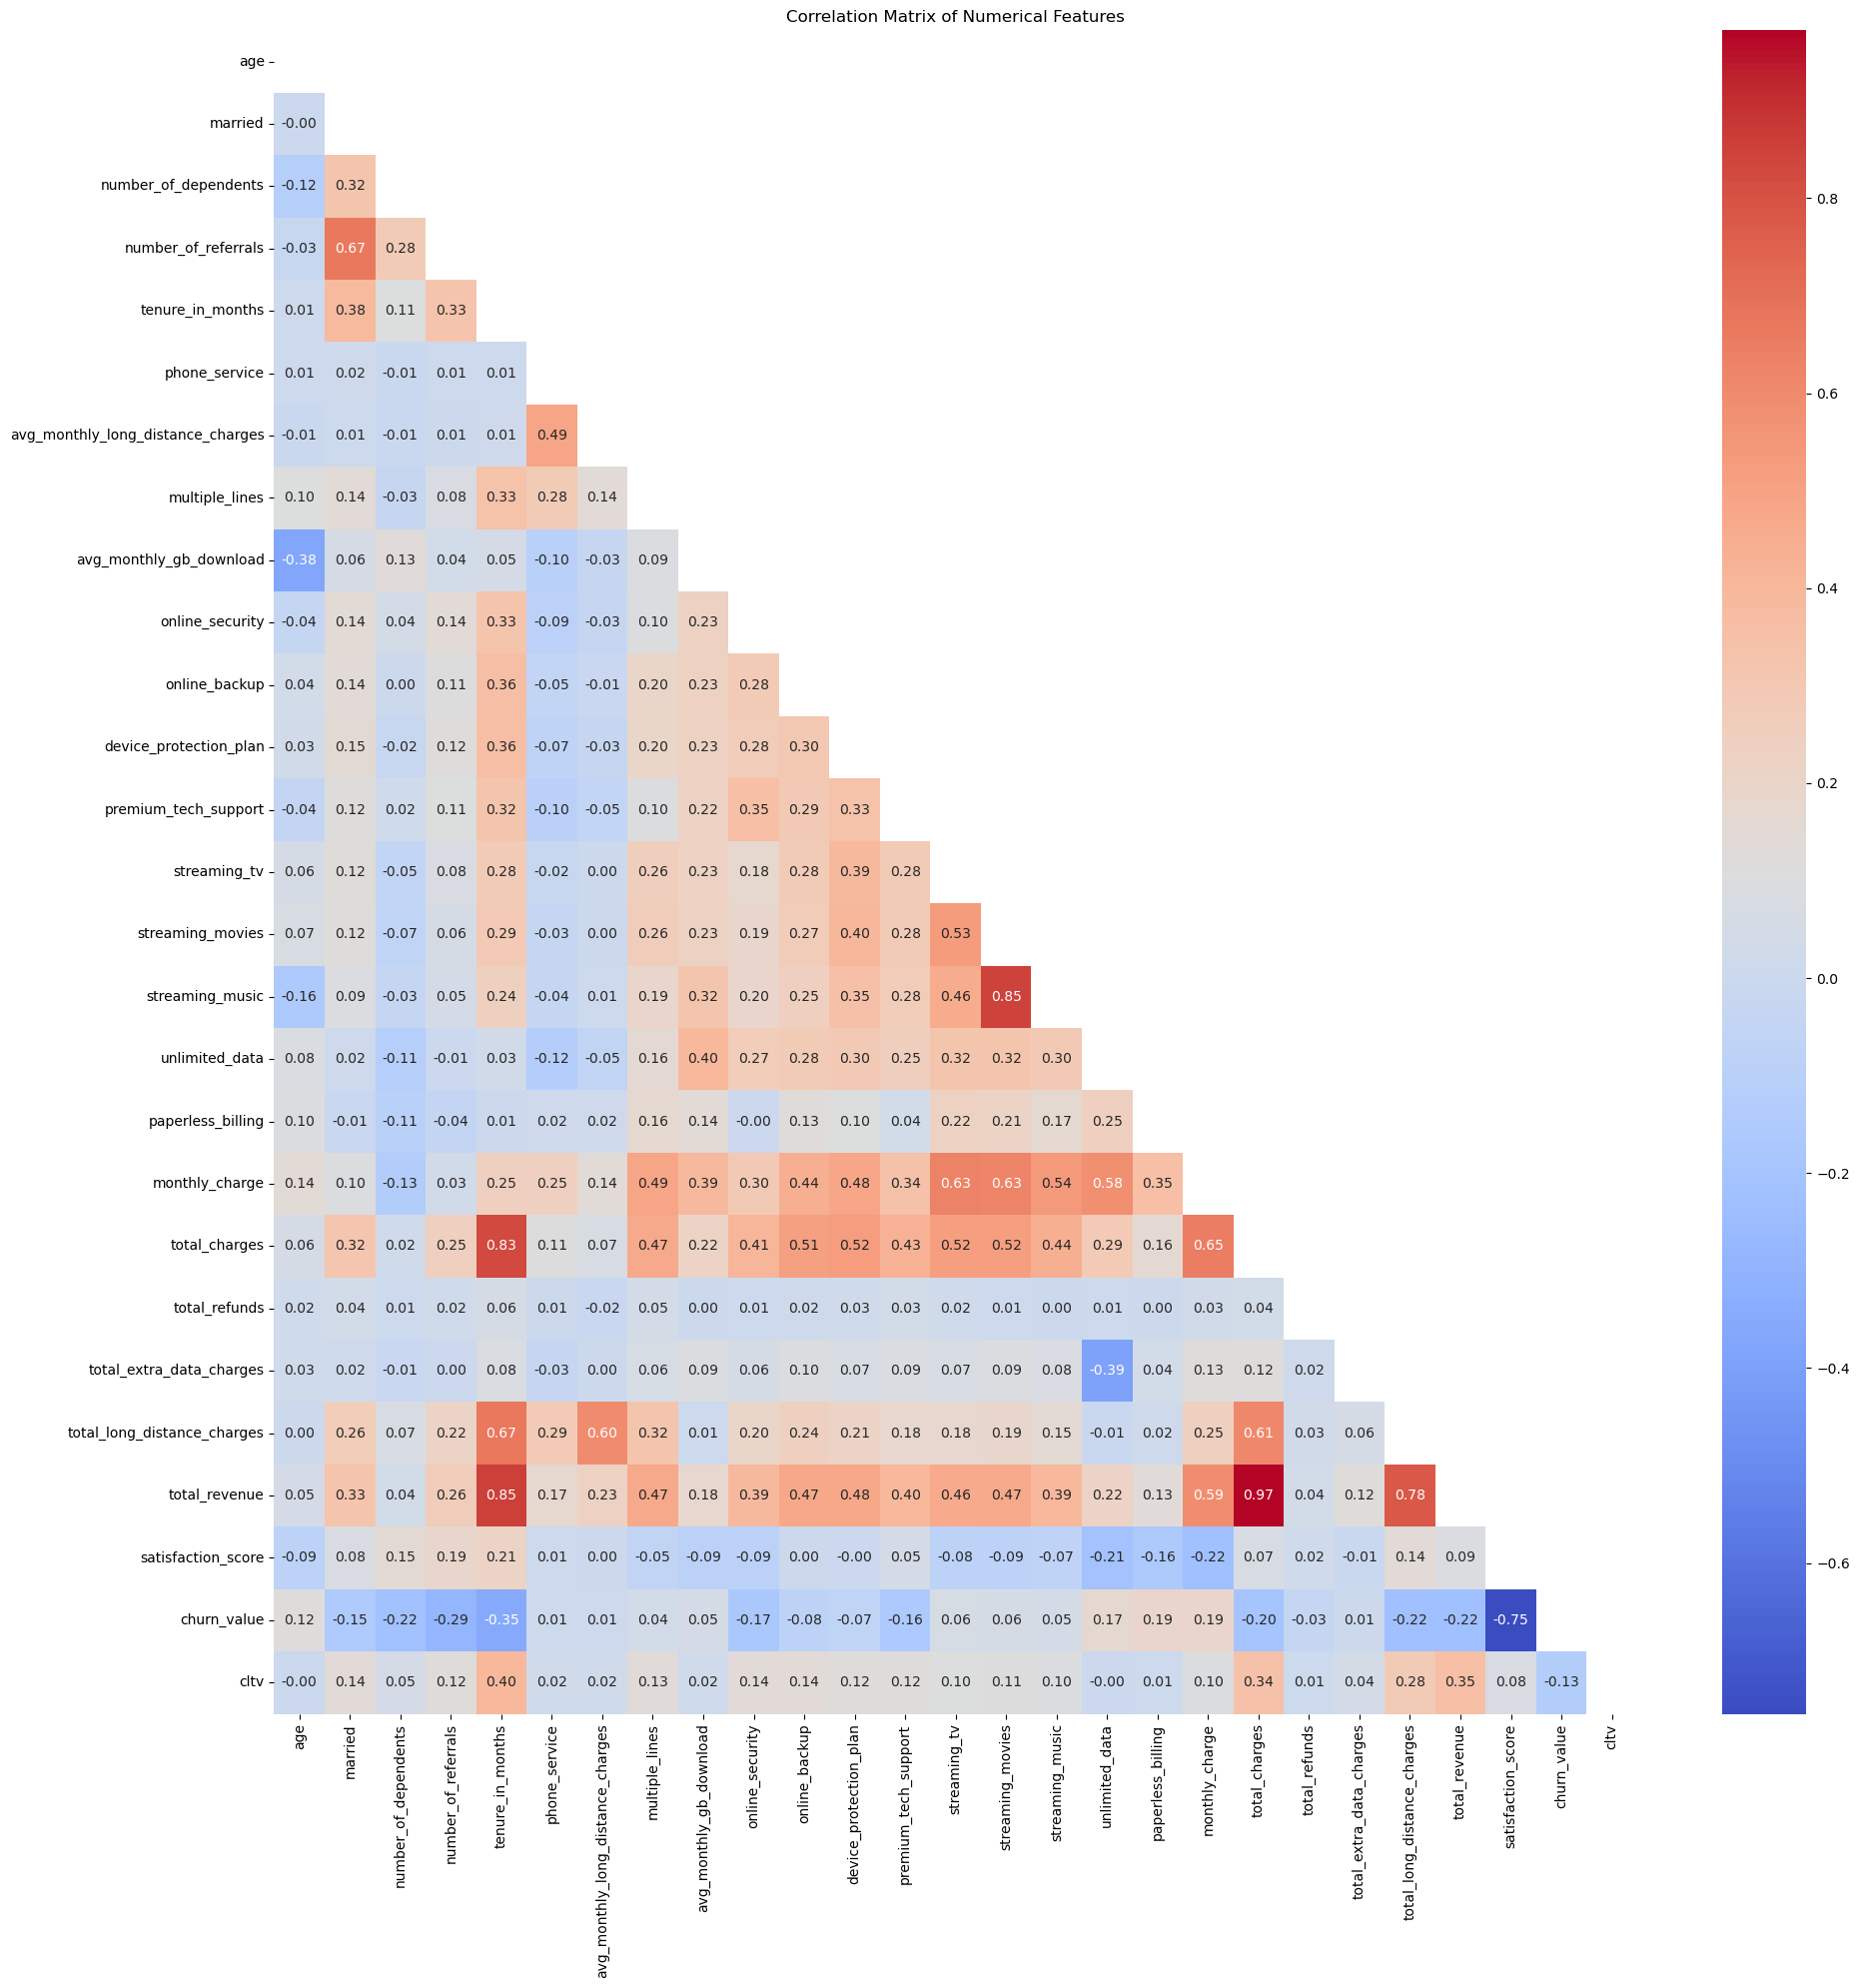

In [29]:
# Correlation matrix for numerical features
plt.figure(figsize=(20, 20))
correlation = telco.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

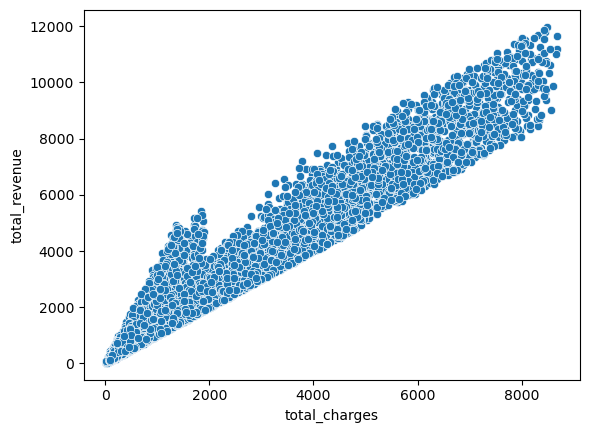

In [30]:
sns.scatterplot(data=telco, x='total_charges', y='total_revenue')
plt.show()

The correlation between `total_charges` and `total_revenue` is too strong, so I'll drop one of them.

In [31]:
telco.drop(['total_charges'], axis=1, inplace=True)

There are two pairs of variables that have a high correlation: `tenure_in_months`-`total_revenue` and `streaming_movies`-`streaming_music`.

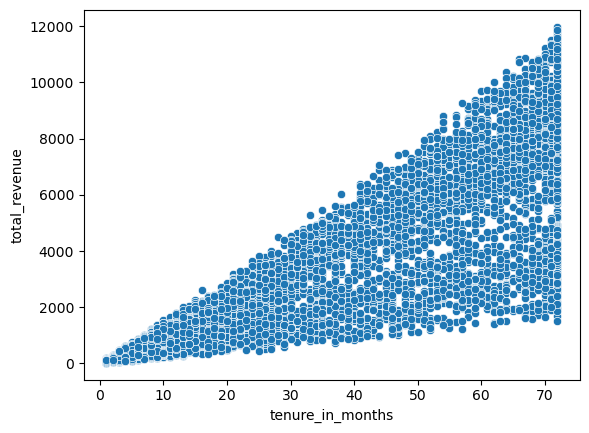

In [32]:
sns.scatterplot(data=telco, x='tenure_in_months', y='total_revenue')
plt.show()

I won't modify the first pair as they are crucial information about the churn risk of a customer. However, whether a customer uses streaming is more important than the distinction between movies and music in this context, so I'll replace the second pair with a new `streaming` feature after chceking how much they correspond.

In [33]:
# Check the correspondence
(telco['streaming_movies'] == telco['streaming_music']).value_counts(normalize=True)

True     0.928156
False    0.071844
Name: proportion, dtype: float64

In [34]:
# Create new streaming feature
telco['streaming'] = telco['streaming_movies'] * telco['streaming_music']

# Remove the previous columns
telco.drop(['streaming_movies', 'streaming_music'], axis=1, inplace=True)

Also, note that `satisfaction_score` has a significant correlation with churn.

## 5. Exploring data distributions

Here is the current version of the dataset:

In [35]:
print(f"Shape: {telco.shape}")
card = cardinality(telco)
card

Shape: (7043, 30)


,nunique,dtype,unique_values
gender,2,object,"[Female, Male]"
churn_value,2,int64,"[0, 1]"
paperless_billing,2,int64,"[1, 0]"
unlimited_data,2,int64,"[1, 0]"
streaming_tv,2,int64,"[1, 0]"
premium_tech_support,2,int64,"[1, 0]"
online_backup,2,int64,"[1, 0]"
online_security,2,int64,"[0, 1]"
multiple_lines,2,int64,"[0, 1]"
device_protection_plan,2,int64,"[0, 1]"


Let's start by visualizing the target variable.

Percentage distribution of the target
churn_value
0    0.73463
1    0.26537
Name: proportion, dtype: float64


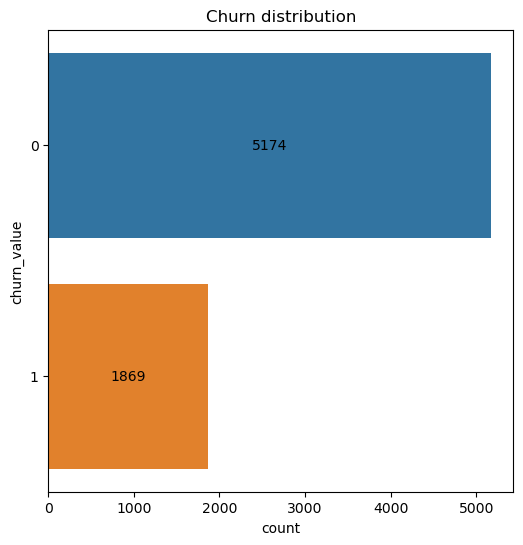

In [36]:
print(f"Percentage distribution of the target")
print(telco['churn_value'].value_counts(normalize=True))

plt.figure(figsize=(6, 6))
s = sns.countplot(data=telco, y='churn_value')
plt.bar_label(s.containers[0], label_type='center')
plt.title("Churn distribution")
plt.show()

The target variable is imbalanced; I'll explore options to handle this during modeling stage.

In order to visualize the distribution of features effectively, I'll group them according to the cardinality of their values set.

In [37]:
# Features to visualize pie charts and count plots
class_cols = card[card['nunique'] < 10].index.to_list()
class_cols.remove('churn_value')

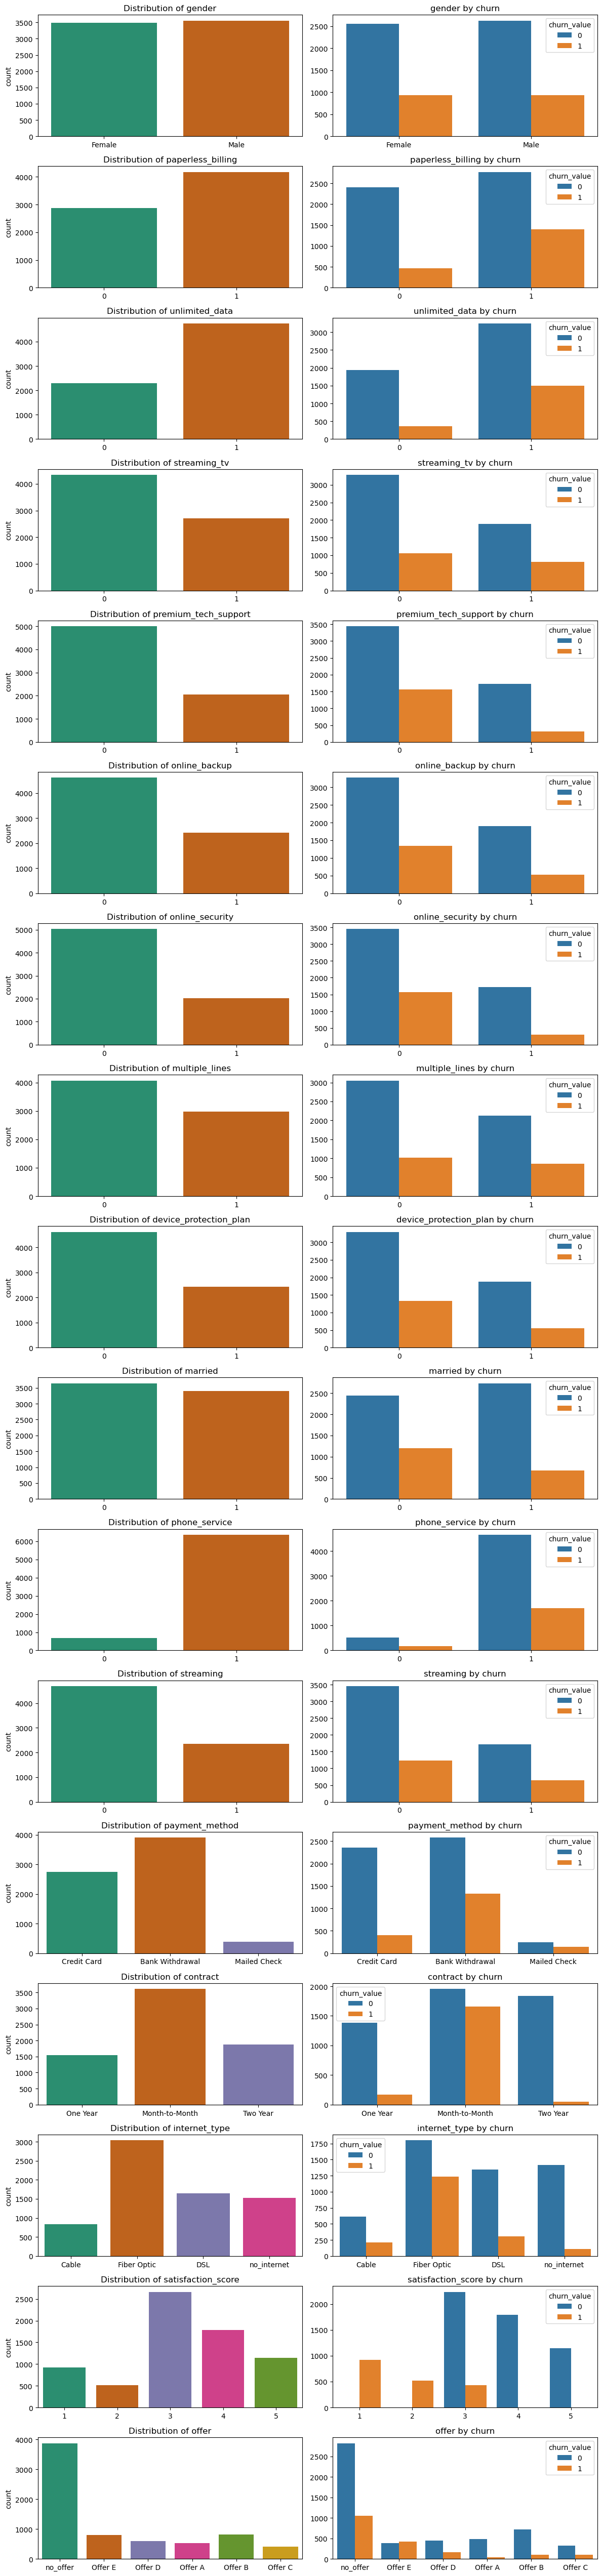

In [38]:
fig, axes = plt.subplots(len(class_cols), 2, figsize=(12, len(class_cols) * 3))

for i, col in enumerate(class_cols):
    sns.countplot(data=telco, x=col, ax=axes[i, 0], palette='Dark2')
    axes[i, 0].set_title(f"Distribution of {col}")
    axes[i, 0].set_xlabel('')

    sns.countplot(data=telco, x=col, hue='churn_value', ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} by churn")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

Some observations:

- `contract`: The most dramatic observation is that people who have month-on-month contracts are way more likely to churn compared to othe types of contracts which makes sense as these customers choose not to commit to long-term plans

- `payment_method`: People that use bank withdarawal for their payment method are more likely to churn

- `internet_type`: People that use fiber optic are more likely to churn compared to other internet types

- `offer`: Among the offer types, Offer E stands out as the only option where people are more likely to churn than not, so this offer type seems escpacially dissatisfactory for customers

- `number_of_referrals`: People who have a single referral seem much more likely to churn compared to other number of referrals

Some less dramatic observations:

- People who have `paperless_billing`, `unlimited_date`, `streaming_tv` and `streaming_movies` seem more likely to churn

- People who are not `married` seem more likely to churn

- `gender`: Males and females seem equally likely to churn, and the number of males and females seem roughly equal in the dataset

One observation that raises questions:

- `satisfaction_score`: It seems that people with scores less than 3 always churn, and people with scores higher than 3 never do. This is too perfect, let's investigate further:

In [39]:
telco[telco['satisfaction_score'] < 3]['churn_value'].value_counts()

churn_value
1    1440
Name: count, dtype: int64

In [40]:
telco[telco['satisfaction_score'] > 3]['churn_value'].value_counts()

churn_value
0    2938
Name: count, dtype: int64

This does not look good; `satisfaction_score` provides churn outcome information perfectly for around 4400 data points! It may be that these scores were collected after the customer's decision to leave or extend contract, but in any case, this feature indicates data leakage and I'll remove it from the dataset.

In [41]:
telco.drop(['satisfaction_score'], axis=1, inplace=True)

Let's continue with visualizing the rest of the variables.

In [42]:
num_cols = card[card['nunique'] >= 10].index.to_list()

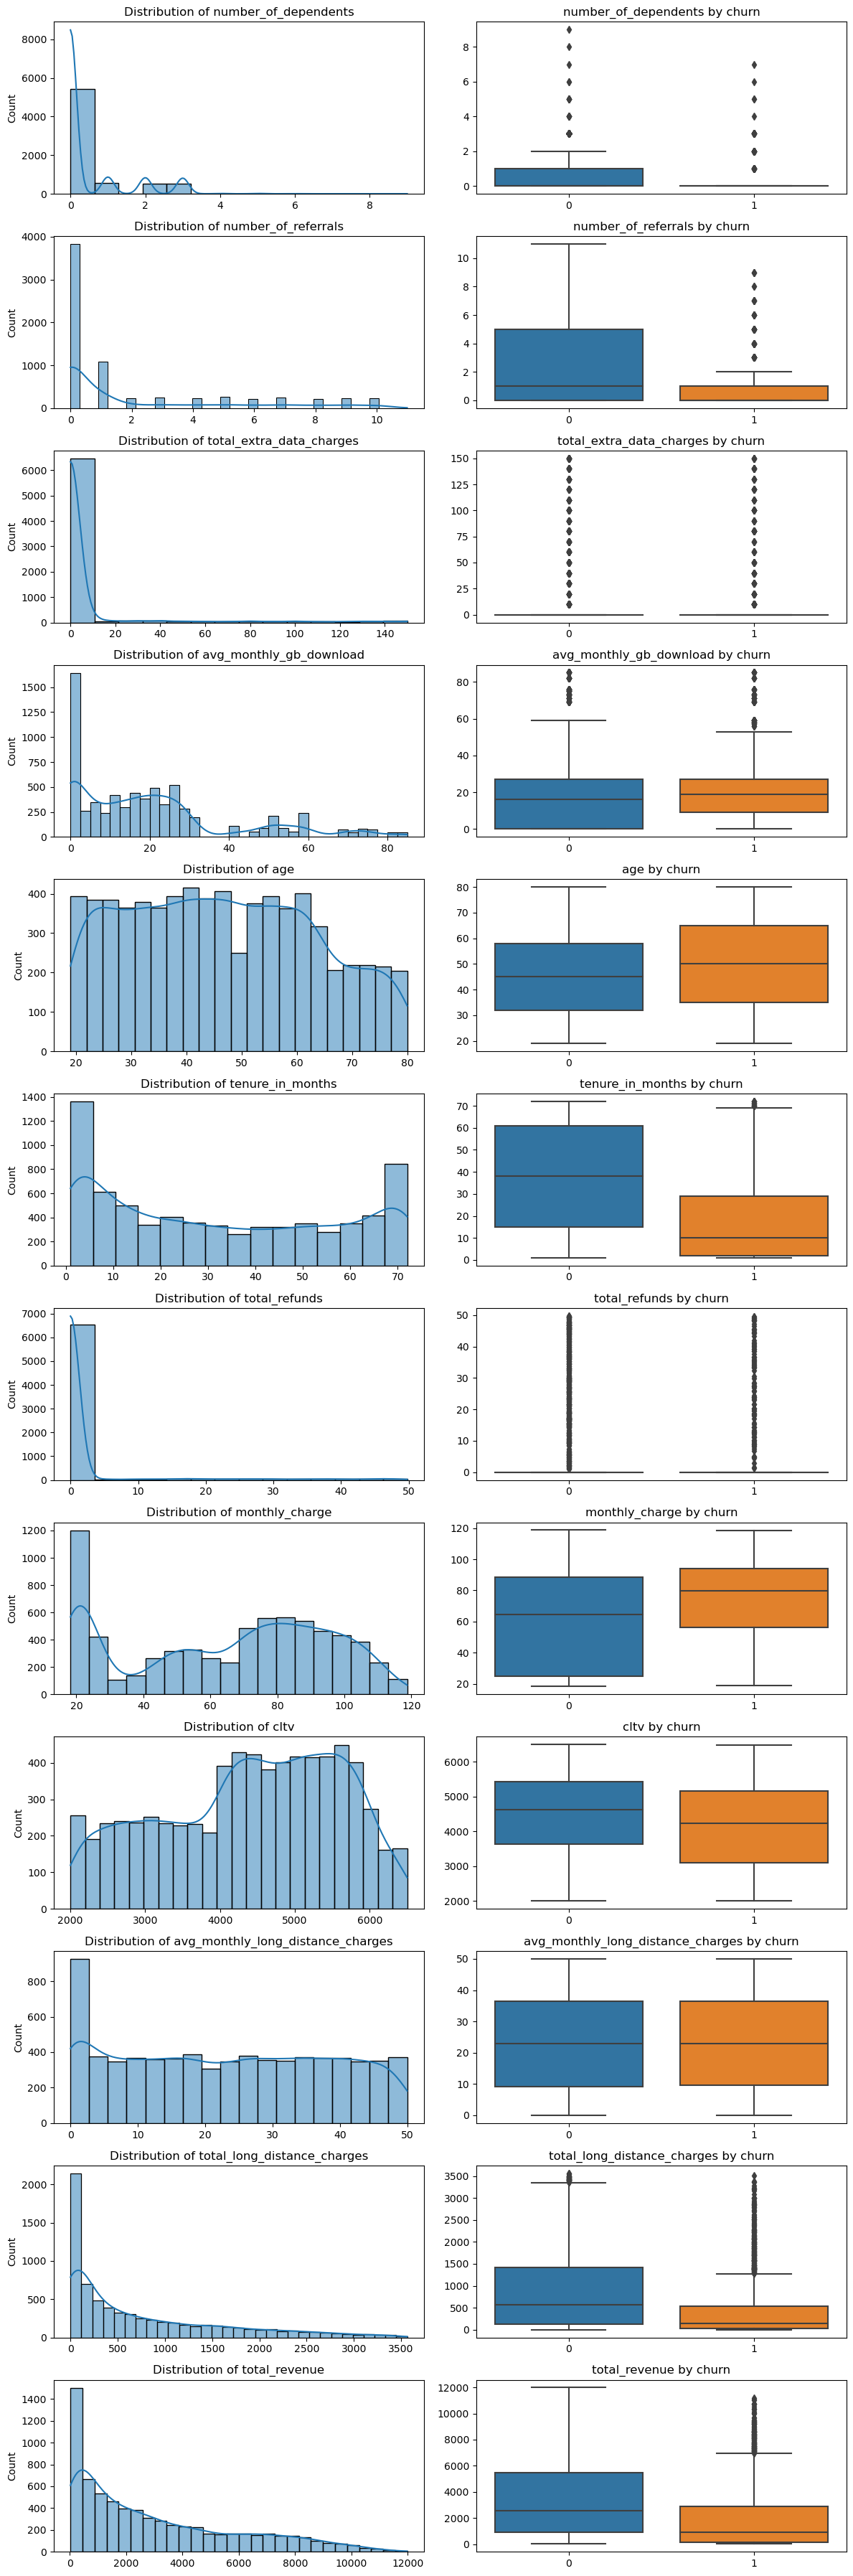

In [43]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    sns.histplot(data=telco, x=col, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f"Distribution of {col}")
    axes[i, 0].set_xlabel('')

    sns.boxplot(data=telco, x='churn_value', y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} by churn")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

Some observations:

- `tenure_in_months` stands out; people who have been with the company for less seem more likely to churn

- `number_of_dependents`, `number-of_referrals`: People who don't have dependents, and people who have note referred a friend seem more likely to churn

- People with a higher `monthly_charge` seem slightly more likely to churn, however people with a smaller `total_revenue` or `total_long_distance_charges` seem more likely to churn

## 6. Transforming skewed features

In this section I'll apply log-transform to the two numerical features that stand out as right-skewed in the plots above: `total_long_distance_charges` and `total_revenue`.

In [44]:
for col in ['total_long_distance_charges', 'total_revenue']:
    telco[f"log_{col}"] = np.log1p(telco[col])

telco.drop(['total_long_distance_charges', 'total_revenue'], axis=1, inplace=True)

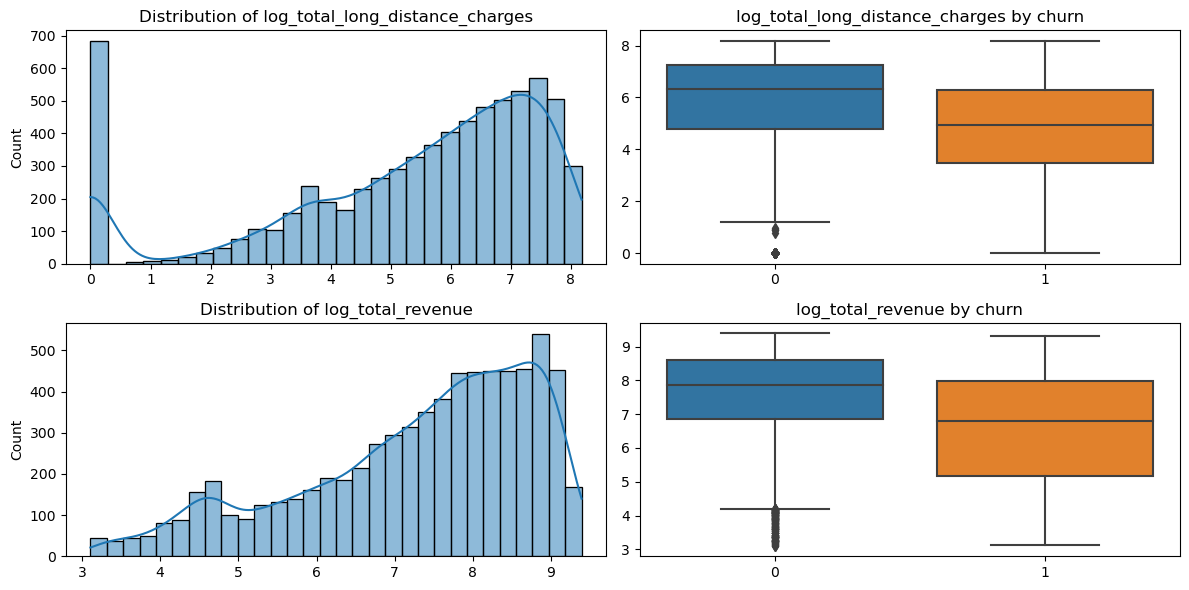

In [45]:
transformed = ['log_total_long_distance_charges', 'log_total_revenue']

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for i, col in enumerate(transformed):
    sns.histplot(data=telco, x=col, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f"Distribution of {col}")
    axes[i, 0].set_xlabel('')

    sns.boxplot(data=telco, x='churn_value', y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} by churn")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

## 7. Outliers

In [46]:
card = cardinality(telco)
card[card['nunique'] >= 10]

,nunique,dtype,unique_values
number_of_dependents,10,int64,"[0, 3, 1 ...(cont'd)]"
number_of_referrals,12,int64,"[2, 0, 1 ...(cont'd)]"
total_extra_data_charges,16,int64,"[0, 10, 20 ...(cont'd)]"
avg_monthly_gb_download,50,int64,"[16, 10, 30 ...(cont'd)]"
age,62,int64,"[37, 46, 50 ...(cont'd)]"
tenure_in_months,72,int64,"[9, 4, 13 ...(cont'd)]"
total_refunds,500,float64,"[0.0, 38.33, 21.25 ...(cont'd)]"
monthly_charge,1585,float64,"[65.6, 59.9, 73.9 ...(cont'd)]"
cltv,3438,int64,"[2205, 5414, 4479 ...(cont'd)]"
avg_monthly_long_distance_charges,3584,float64,"[42.39, 10.69, 33.65 ...(cont'd)]"


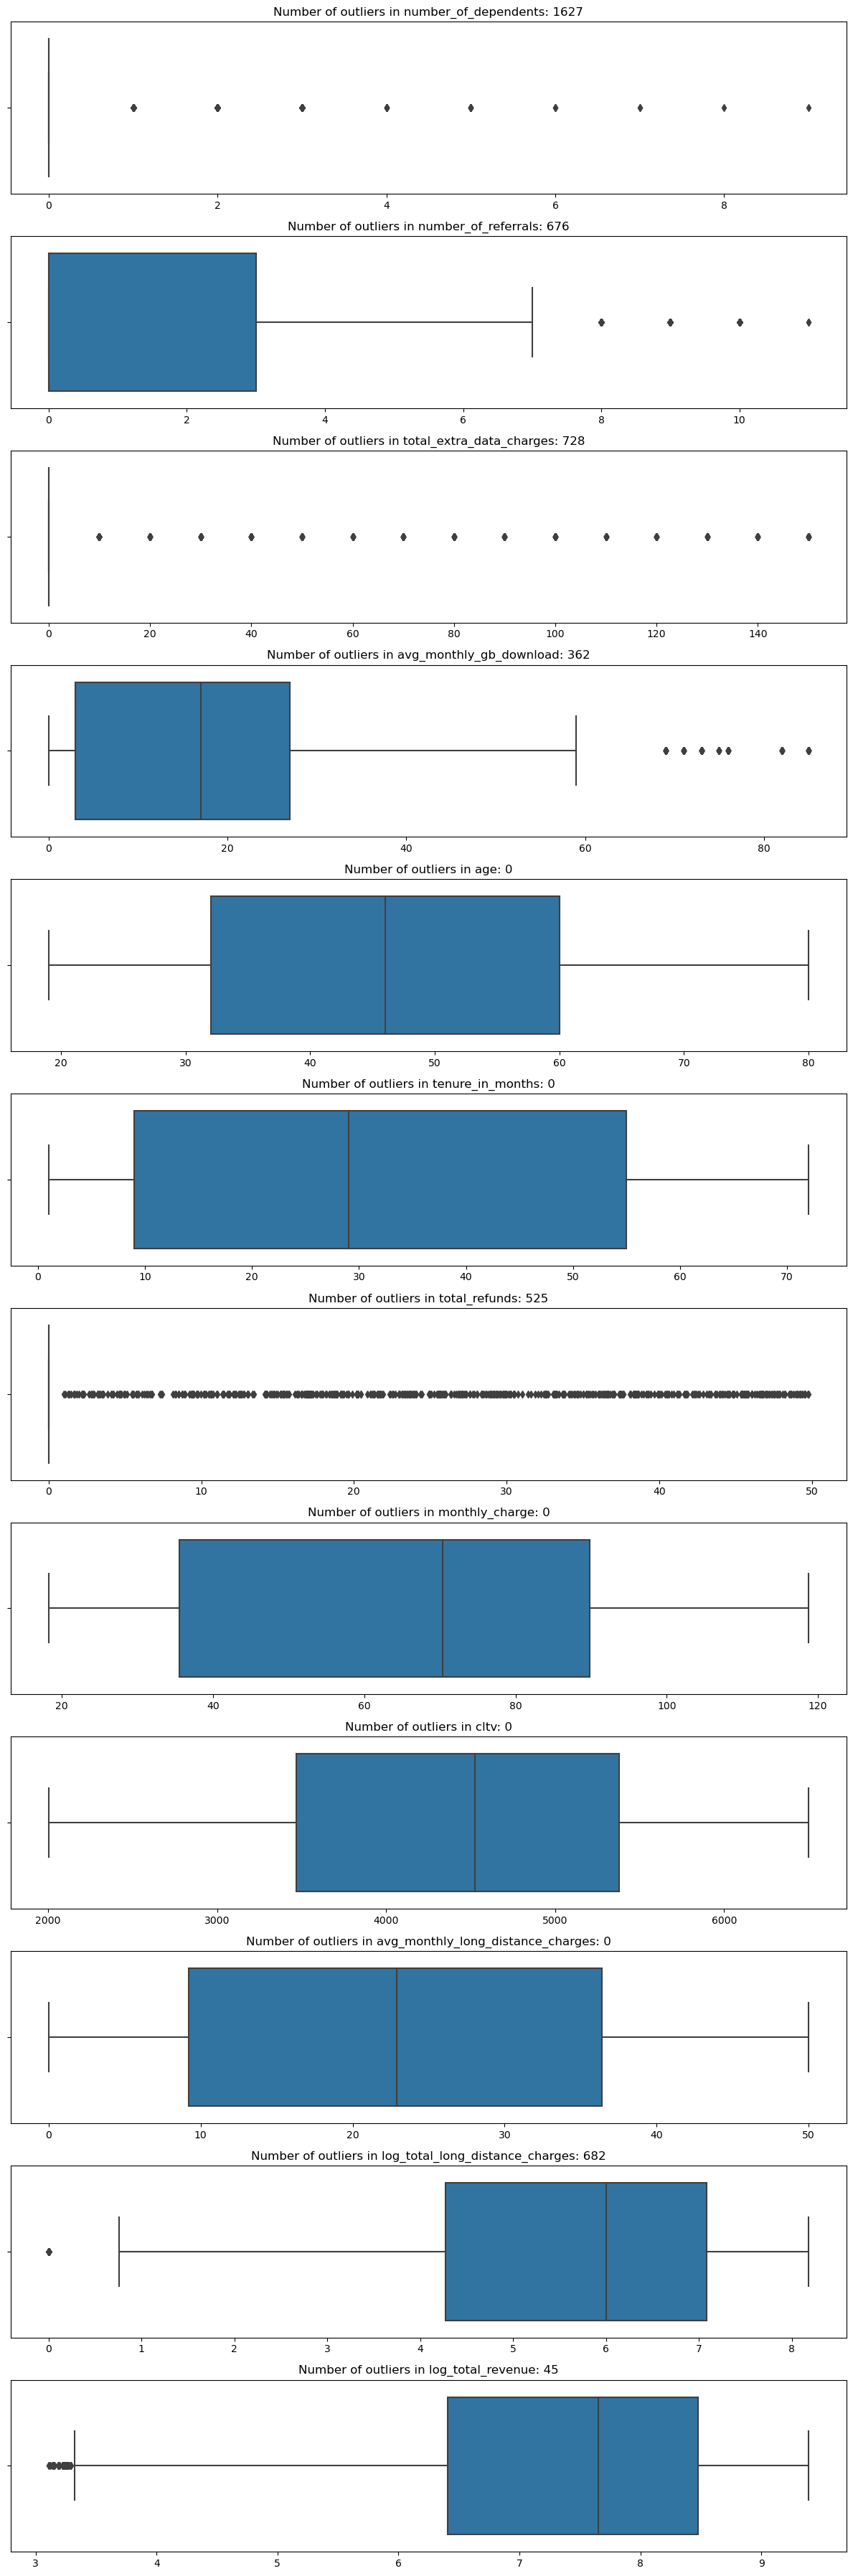

In [47]:
num_cols = card[card['nunique'] >= 10].index

def identify_outliers(col, df=telco):
    """Returns the outliers list and their cardinality"""
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bd = q1 - 1.5 * iqr
    upper_bd = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bd) | (df[col] > upper_bd)][col]

    return len(outliers), list(outliers)

# Plot outliers using box plots
fig, axes = plt.subplots(len(num_cols), 1, figsize=(12, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    sns.boxplot(data=telco, x=col, ax=axes[i])
    axes[i].set_title(f"Number of outliers in {col}: {identify_outliers(col)[0]}")
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

Most of these columns have outliers but they are not non-sensical and the data points seem informative, so I won't modify anything at this stage.

## 8. Exporting dataset & concluding remarks

In this notebook, I have examined and transformed the dataset features thoroughly and prepared it for the next prepocessing and modeling pipelines. 

More explicitly, I have:

- replaced missing vales with appropriate ones based on the feature

- removed several features that had repeated info, kept data as granular as possible

- chosen to remove location related features too focus on a simpler churn model

- removed features with no variance and id values as they are not useful for this analysis

- handled several target related features to avoid data leakage

- encoded binary variables manually to have positive values correspond to 1s to ensure consistent interpretability

- inspected correlations, removed several features and created a new feature to avoid collinearity

- explored data distributions, wrote down conclusions from visual analysis, removed a feature after noticing data leakage

- applied log-transform to two right-skewed features

- inspected outliers

In [48]:
print(f"Shape: {telco.shape}")
telco.head()

Shape: (7043, 29)


,gender,age,married,number_of_dependents,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_refunds,total_extra_data_charges,churn_value,cltv,streaming,log_total_long_distance_charges,log_total_revenue
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37,1,0,2,9,no_offer,1,42.39,0,Cable,16,0,1,0,1,1,1,One Year,1,Credit Card,65.6,0.00,0,0,2205,0,5.946755,6.883268
0003-MKNFE,Male,46,0,0,0,9,no_offer,1,10.69,1,Cable,10,0,0,0,0,0,0,Month-to-Month,0,Credit Card,59.9,38.33,10,0,5414,1,4.576874,6.415555
0004-TLHLJ,Male,50,0,0,0,4,Offer E,1,33.65,0,Fiber Optic,30,0,0,1,0,0,1,Month-to-Month,1,Bank Withdrawal,73.9,0.00,0,1,4479,0,4.909709,6.031766
0011-IGKFF,Male,78,1,0,1,13,Offer D,1,27.82,0,Fiber Optic,4,0,1,1,0,1,1,Month-to-Month,1,Bank Withdrawal,98.0,0.00,0,1,3714,0,5.893466,7.378078
0013-EXCHZ,Female,75,1,0,3,3,no_offer,1,7.38,0,Fiber Optic,11,0,0,0,1,1,1,Month-to-Month,1,Credit Card,83.9,0.00,0,1,3464,0,3.141563,5.671741


In [49]:
cardinality(telco)

,nunique,dtype,unique_values
gender,2,object,"[Female, Male]"
streaming,2,int64,"[0, 1]"
churn_value,2,int64,"[0, 1]"
paperless_billing,2,int64,"[1, 0]"
unlimited_data,2,int64,"[1, 0]"
streaming_tv,2,int64,"[1, 0]"
premium_tech_support,2,int64,"[1, 0]"
online_backup,2,int64,"[1, 0]"
online_security,2,int64,"[0, 1]"
device_protection_plan,2,int64,"[0, 1]"


In [50]:
telco.to_csv("../data/processed/telco_cleaned.csv")

In the next notebook, I will create pipelines that include the next prepocessing steps such as separating the dataset into training and test sets, scaling and one-hot encoding. Comparing models will follow including logistic regression, random forest classifier and xgboost.

Remarks:

- I have kept data more granular than binary whenever I could, but it's worthwhile to experiment with simpler binary encodings to see which performs better. Relevant features include `internet_type`, `number_of_dependents`, `number_of_referrals`, `offer`, `age`.

- It is worthwhile to experiment with customizing `tenure_in_months` as it is highly correlated with churn and also with `total_revenue`. I could try binning into groups or consider `total_revenue`/`tenure_in_months`.

- I haven't examined relationships between categorical variables yet, I need to add this correlation analysis to this notebook.

